# Numerical Optimization HW1(0915)
### 20211108 Donghyuk Jung

In [26]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def f(x):
    return ((x - 1 ) ** 2) - 2
 
x = np.linspace(-5, 10, 100)
y = f(x)

In [23]:
eps = 10e-8

### Bisection Method Implementation

In [15]:
def bisec(a,b,f):
    m = (a + b) / 2
    f_a, f_b, f_m = f(a), f(b), f(m)
    if f_a * f_m < 0 :
        return a, m
    else:
        return m, b
    
def bisectionFtn(a,b,f):
    if f(a)*f(b)>0 : return NaN
    while True:
        if b - a < eps : 
            return (a + b) / 2
        a, b = bisec(a,b)
        

### Newton Method Implementation

In [17]:
def diff(x,f):
    dx = 10e-3
    return (f(x+dx)-f(x))/dx
def newtonFtn(a,b,f):
    x=a
    x_next=b
    while True: 
        if fabs(x_next-x) < eps:
            return x
        x_next = x - f(x)/diff(x)
        
    

### Secant Method Implementation

In [19]:
# bisection technique is already implemented in Bisection Method
def SecantFtn(a,b,f):
    x=a
    x_pre=a
    x_next
    while True: 
        if fabs(x_next-x) < eps:
            return x
        x_pre = x
        x = x - (x-x_pre)/(f(x)-f(x_pre)) * f(x)
        
        
    

### Regular Falsi Method Implemetation

In [20]:
def SecantFtn(a,b,f):
    x=a
    x_pre
    x_next
    while True: 
        if fabs(x_next-x) < eps:
            return x
        x_pre = x
        x = x - (x-x_pre)/(f(x)-f(x_pre)) * f(x)
        
        
    

---

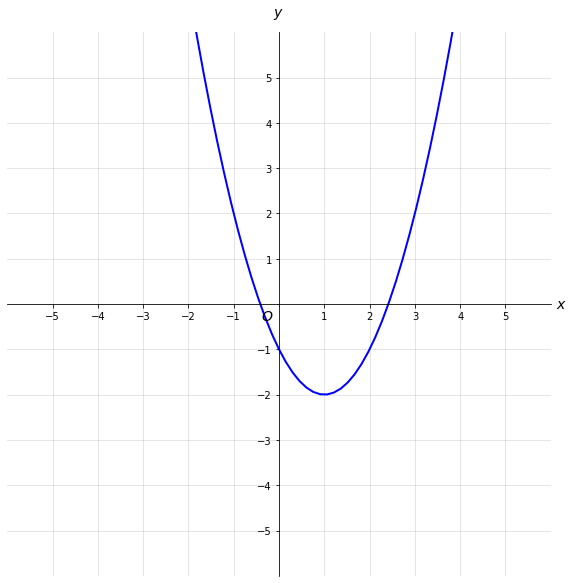

In [27]:
def plotCartesian():
    xmin, xmax, ymin, ymax = -5, 5, -5, 5
    ticks_frequency = 1

    fig, ax = plt.subplots(figsize=(10, 10)) 
    fig.patch.set_facecolor('#ffffff')


    ax.set(xlim=(xmin-1, xmax+1), ylim=(ymin-1, ymax+1), aspect='equal')

    ax.spines['bottom'].set_position('zero')
    ax.spines['left'].set_position('zero')

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.set_xlabel('$x$', size=14, labelpad=-24, x=1.02)
    ax.set_ylabel('$y$', size=14, labelpad=-21, y=1.02, rotation=0)

    plt.text(0.49, 0.49, r"$O$", ha='right', va='top',
        transform=ax.transAxes, horizontalalignment='center', fontsize=14)

    x_ticks = np.arange(xmin, xmax+1, ticks_frequency)
    y_ticks = np.arange(ymin, ymax+1, ticks_frequency)
    ax.set_xticks(x_ticks[x_ticks != 0])
    ax.set_yticks(y_ticks[y_ticks != 0])
    ax.set_xticks(np.arange(xmin, xmax+1), minor=True)
    ax.set_yticks(np.arange(ymin, ymax+1), minor=True)


    ax.grid(which='both', color='grey', linewidth=1, linestyle='-', alpha=0.2)
    return fig, ax


plotCartesian()
plt.plot(x, y, 'b', linewidth=2)

<IPython.core.display.Javascript object>


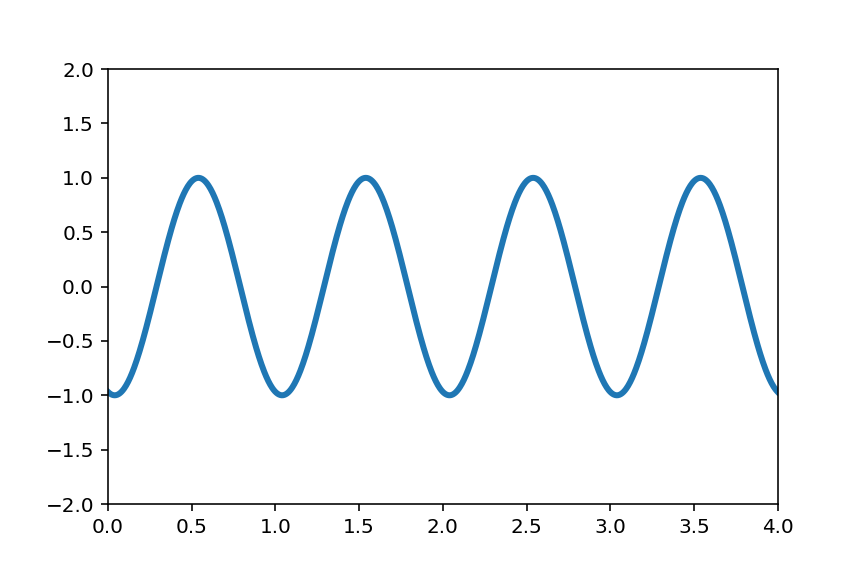

In [21]:
# Enable interactive plot
from matplotlib.animation import FuncAnimation

fig = plt.figure()
ax = plt.axes(xlim=(0, 4), ylim=(-2, 2))
line, = ax.plot([], [], lw=3)


def animate(i):
  x = np.linspace(0, 4, 1000)
  y = np.sin(2 * np.pi * (x - 0.01 * i))
  line.set_data(x, y)
  return line,


# anim = FuncAnimation(fig, animate, frames=200, interval=50)
anim = FuncAnimation(fig, animate, frames=200, interval=100)

plt.show()

<IPython.core.display.Javascript object>


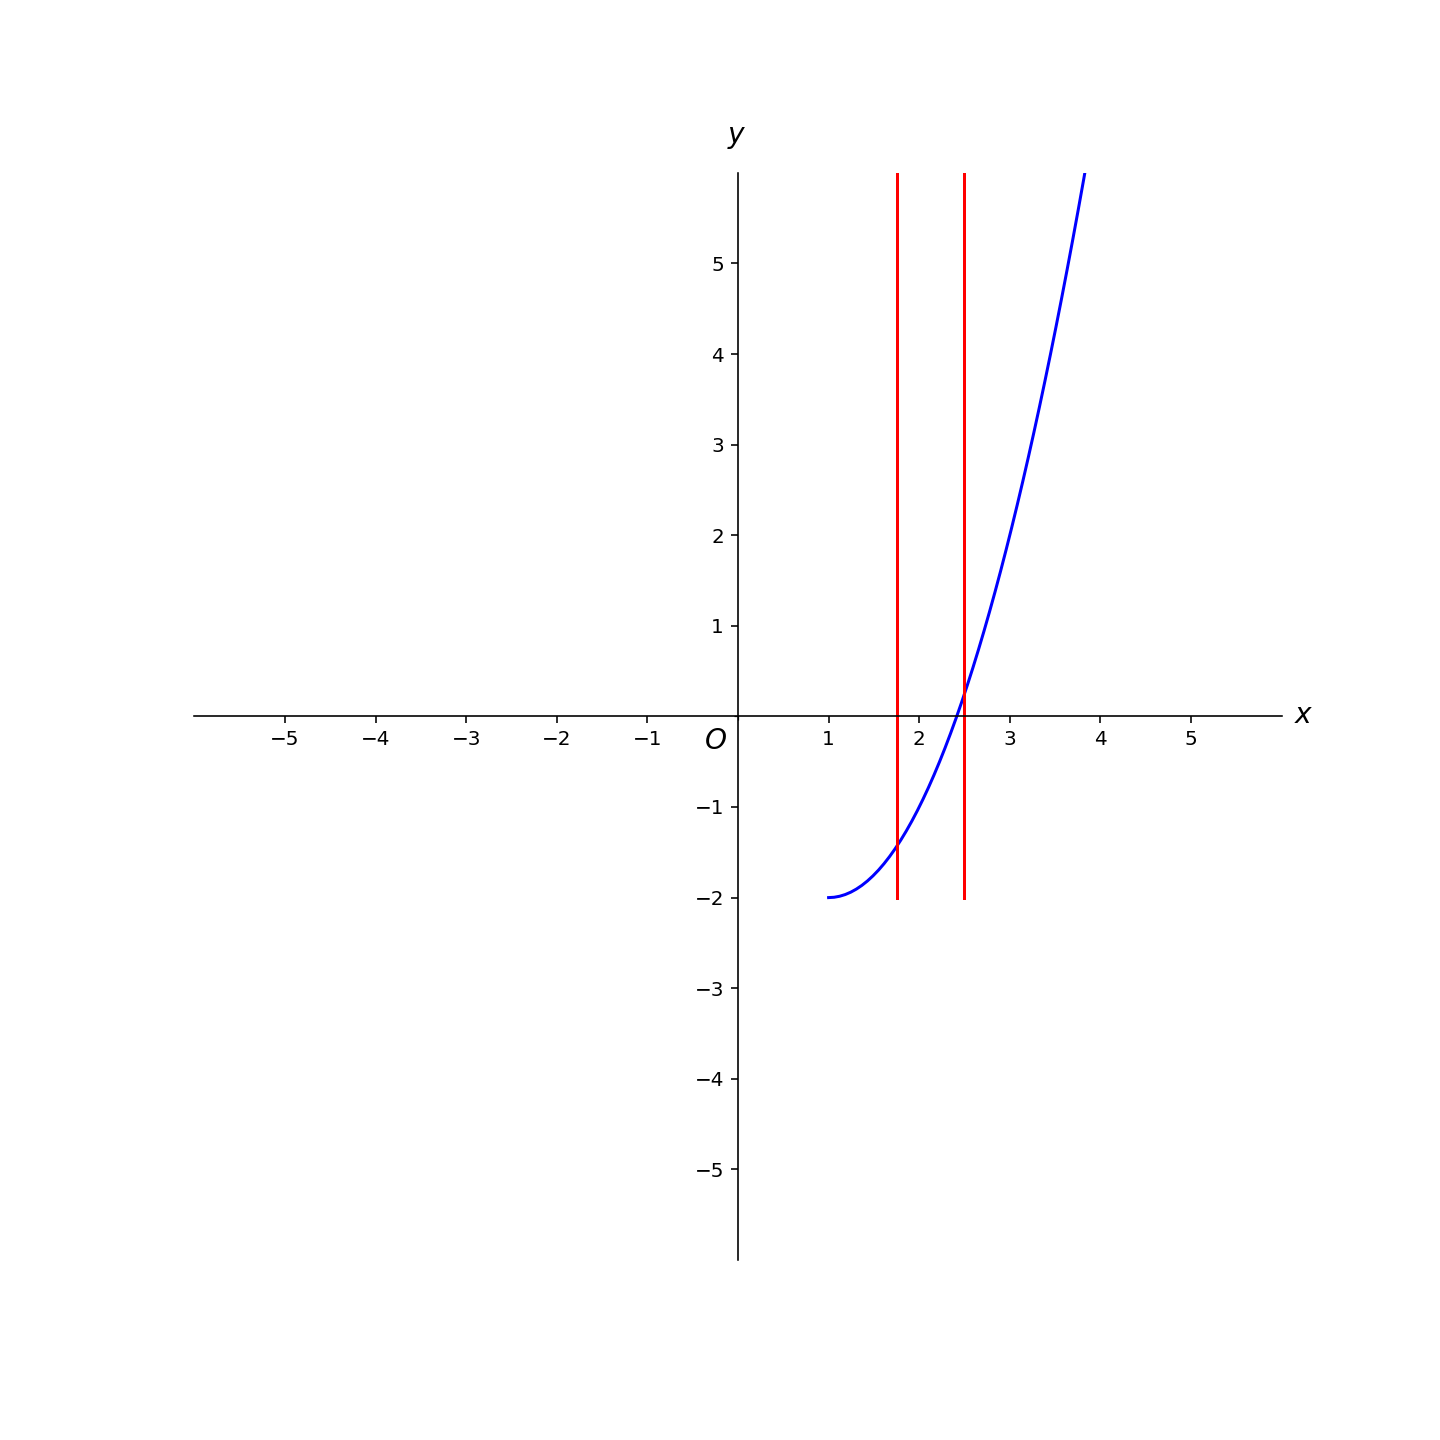

In [46]:
import matplotlib.pyplot as plt 
from matplotlib import animation
import numpy as np 

def sgn(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

def bisect(f,a,b):
    fa = f(a)
    fb = f(b)
    p = a+(b-a)/2
    fp = f(p)
    if sgn(fa) == sgn(fp):
        return p, b
    else:
        return a, p

def bisection_method(f,a,b,n):
    for i in range(n):
        a,b = bisect(f,a,b)
    return a,b



xmin, xmax = 1, 4
yrange = f(xmin), f(xmax)
ymin, ymax = min(yrange), max(yrange) 
vf = np.vectorize(f)
x = np.linspace(xmin,xmax)
y = vf(x)
epsilon = 0.1
# Initialize figure
fig, ax = plotCartesian()
curve, = ax.plot([],[], color='blue')
left, = ax.plot([],[],color='red')
right, = ax.plot([],[],color='red')

# Figure reset between frames
def init():
    left.set_data([],[])
    right.set_data([],[])
    curve.set_data([],[])
    return left, right, curve,

# Animation of bisection
def animate(i):
    a, b = bisection_method(f,xmin,xmax,i)
    left.set_data([a,a],[ymin,ymax])
    right.set_data([b,b],[ymin,ymax])
    curve.set_data(x,y)
    return left, right, curve,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=15, interval=700, blit=True)

plt.grid()
plt.show()